In [ ]:
!pip install nibabel --upgrade

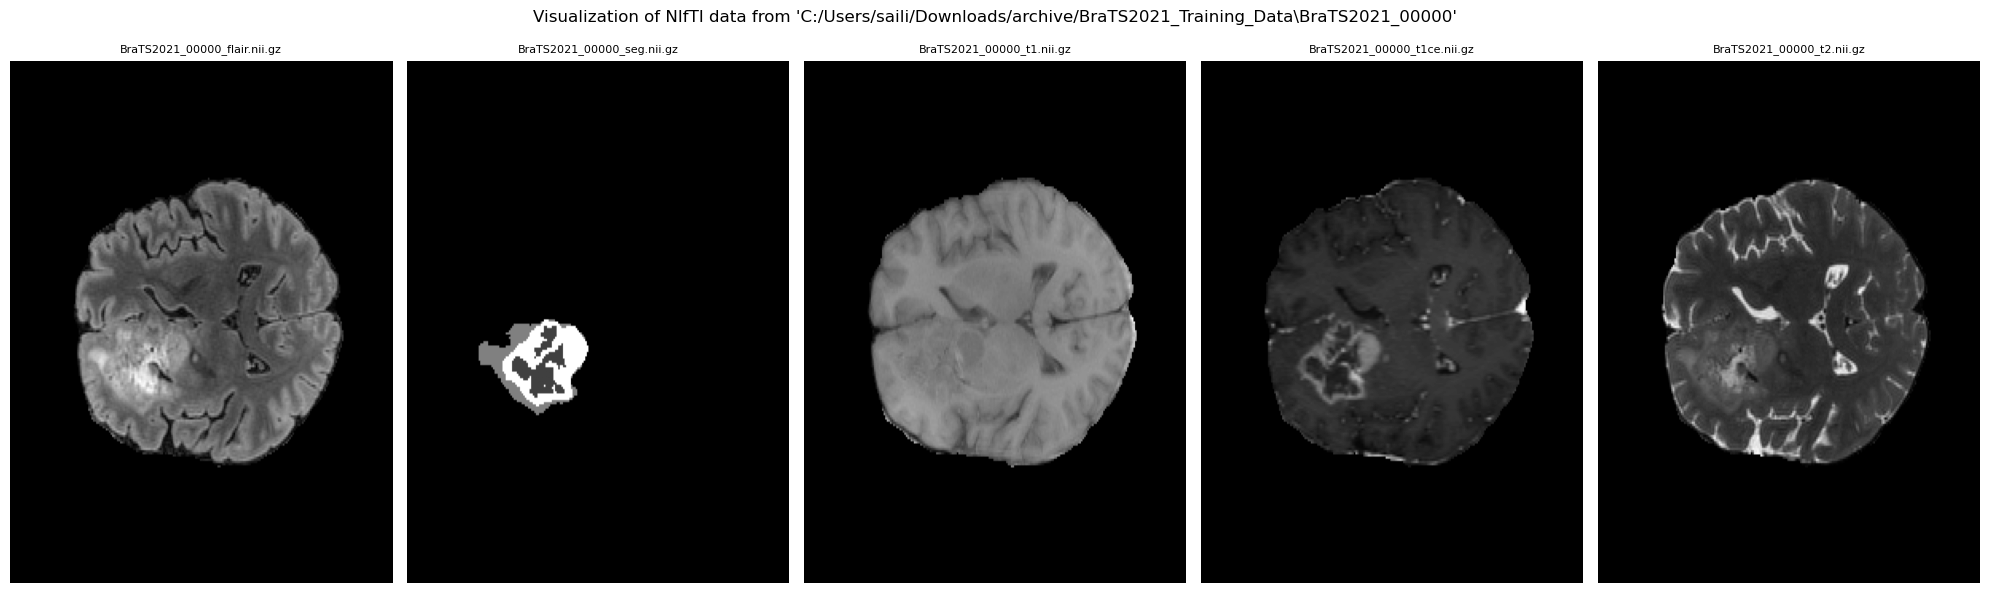

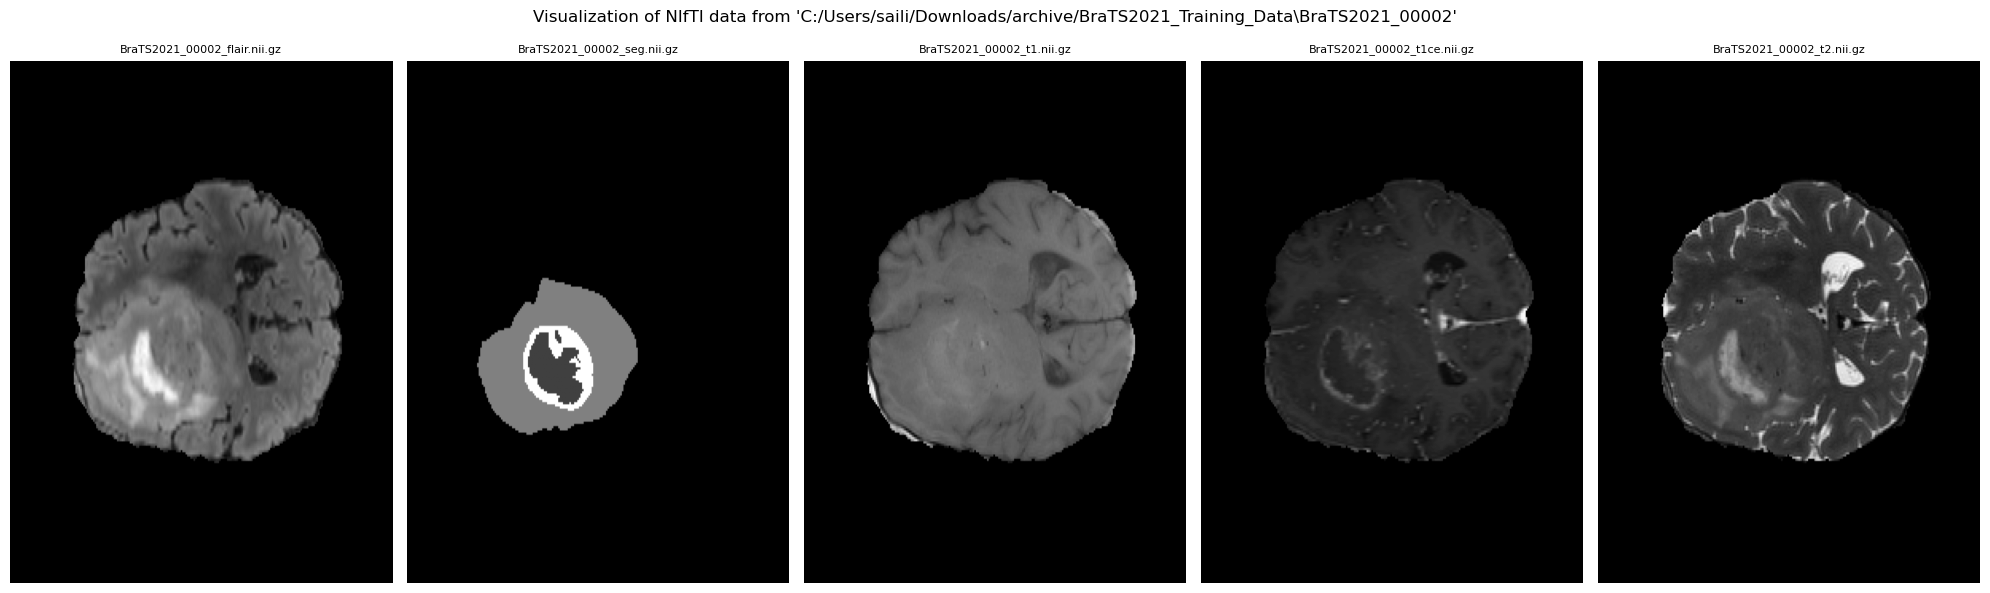

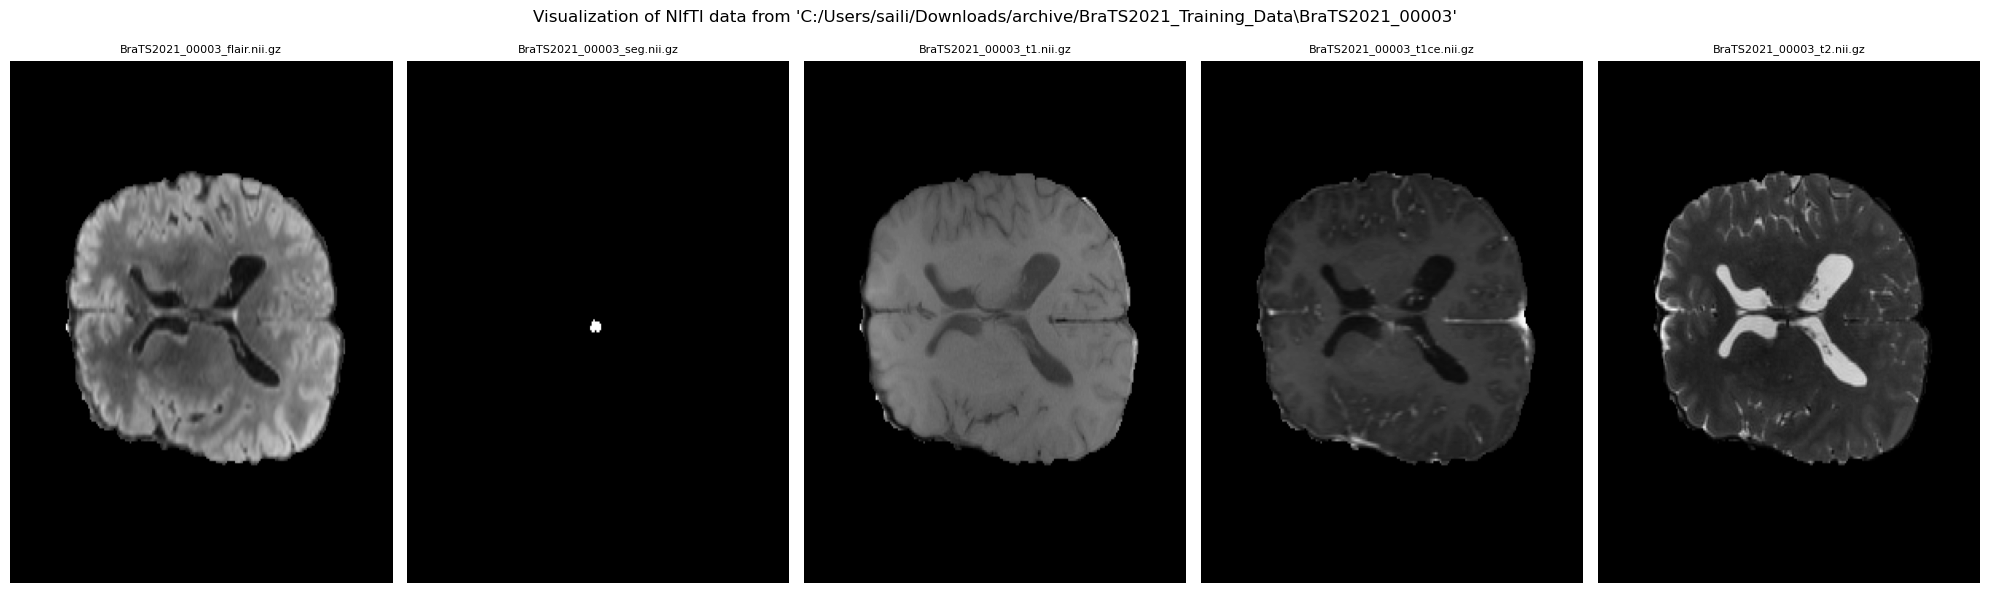

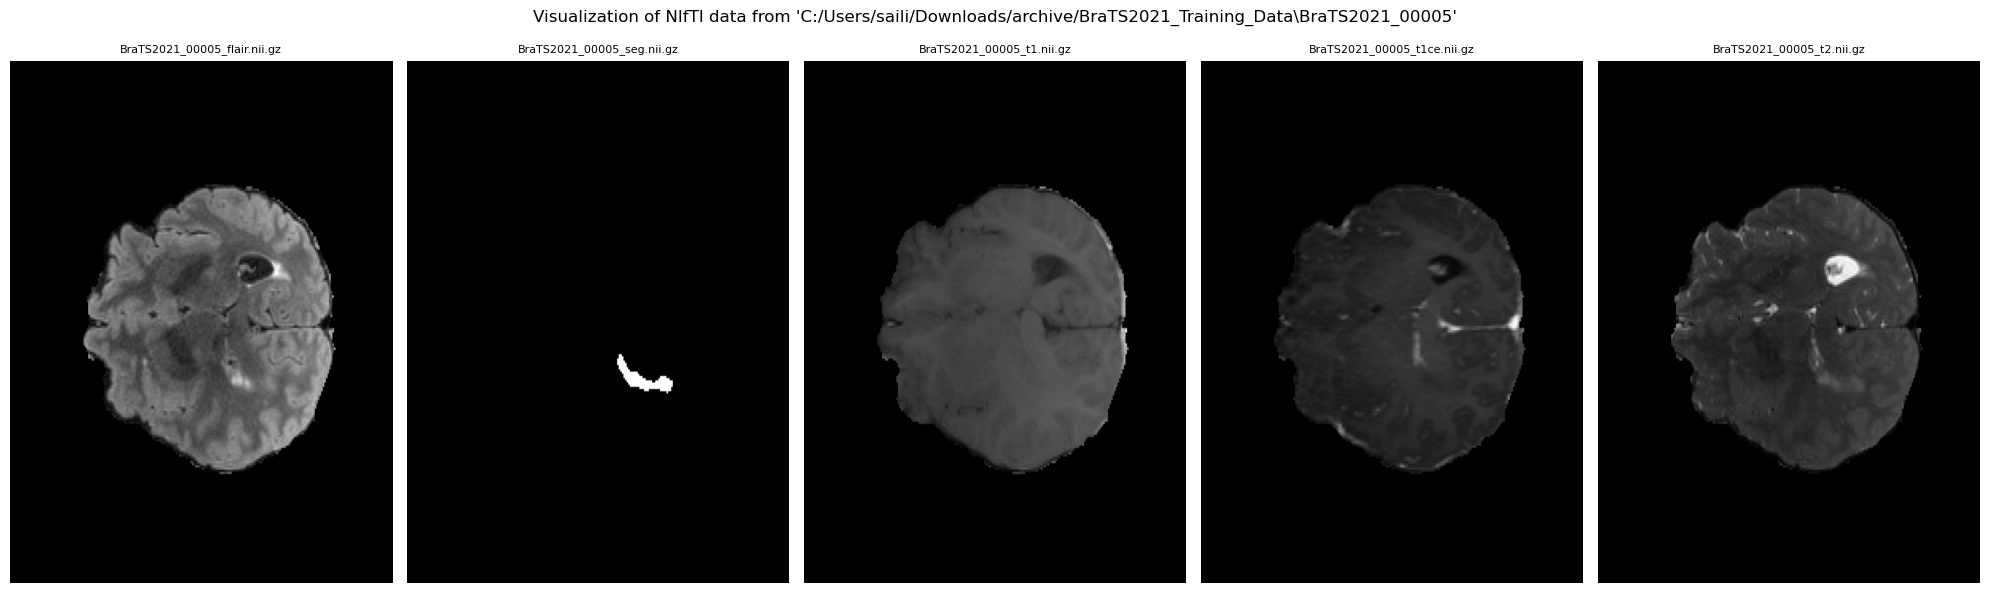

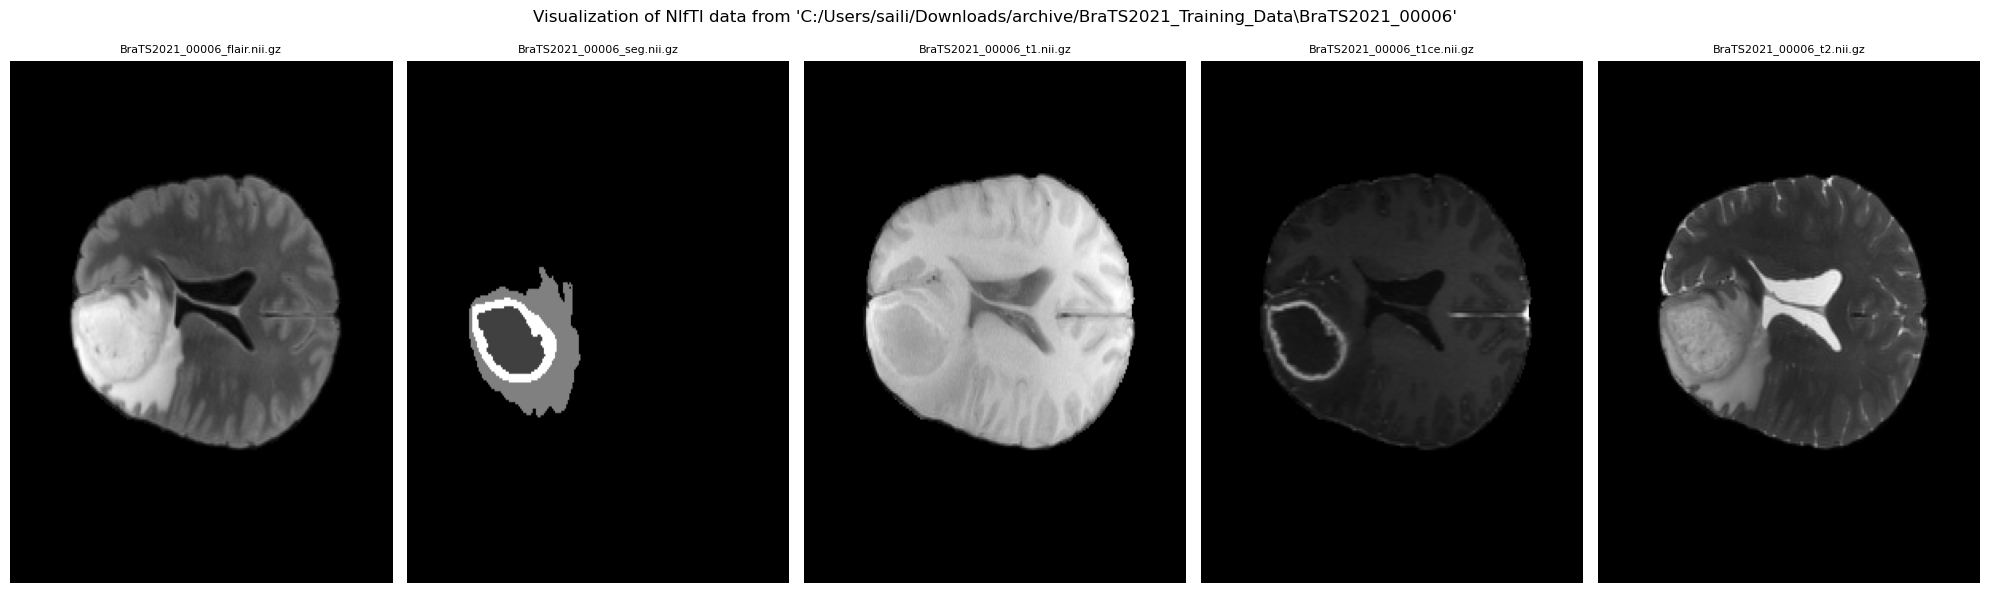

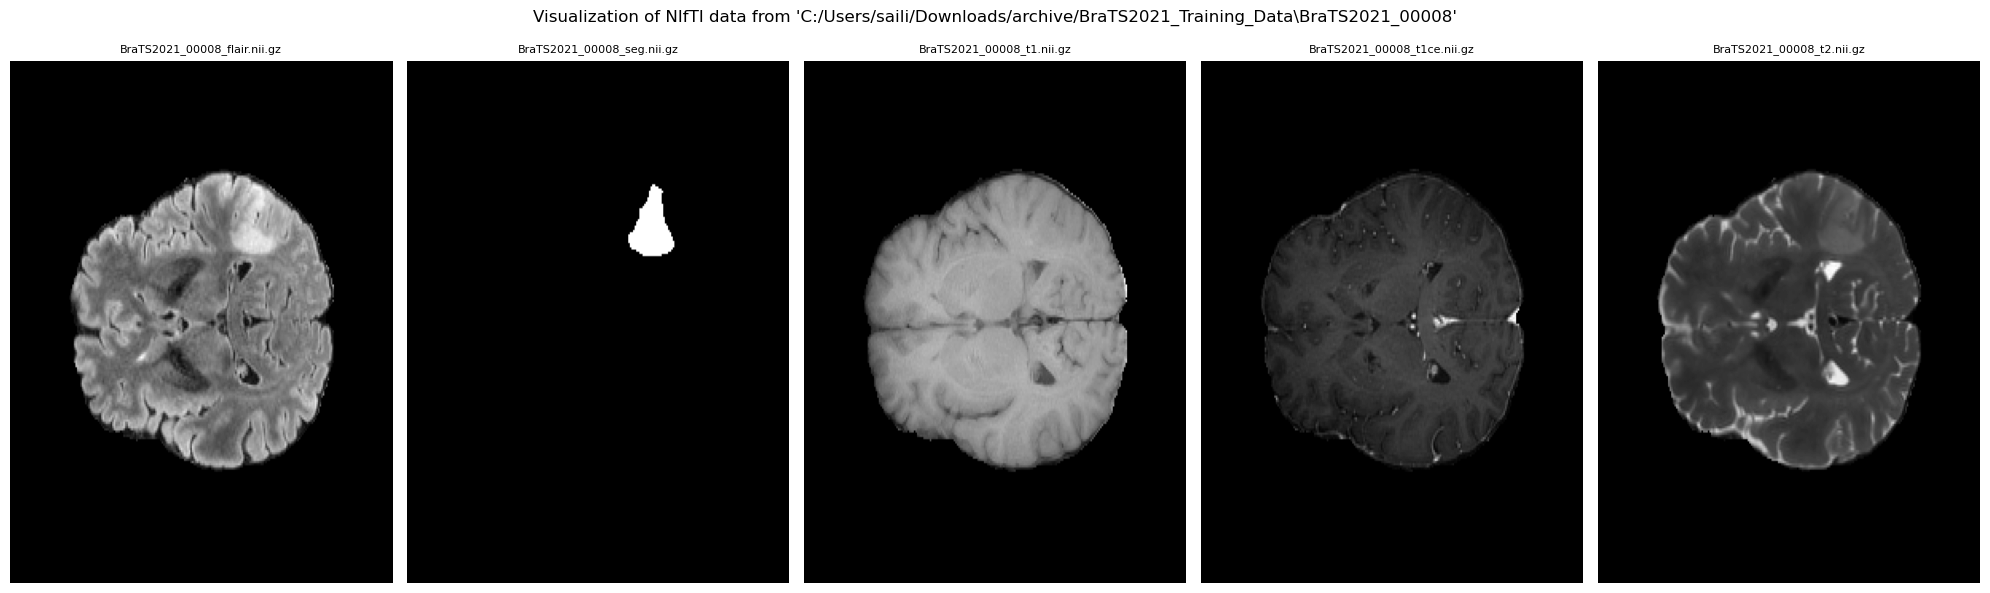

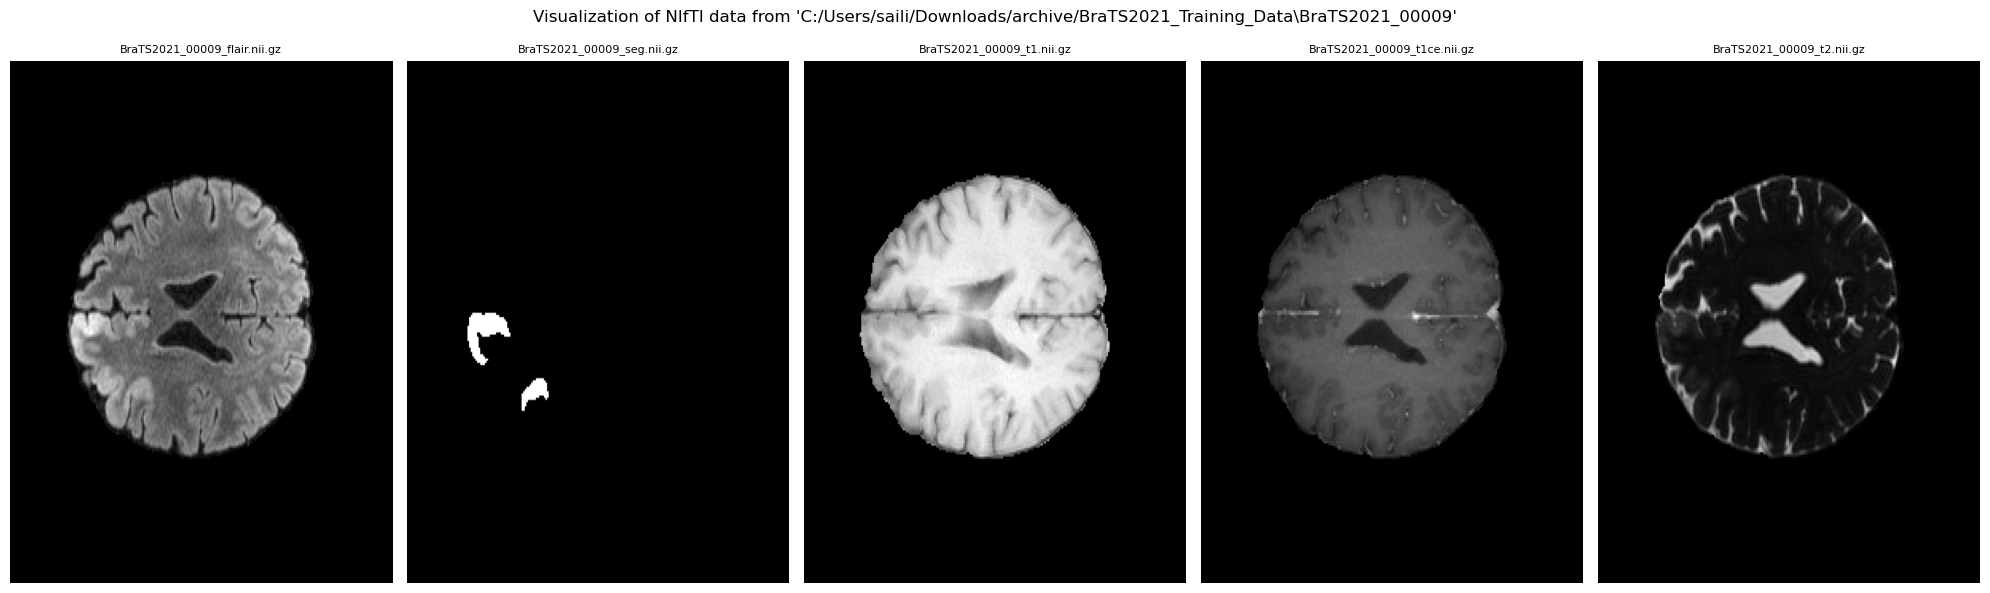

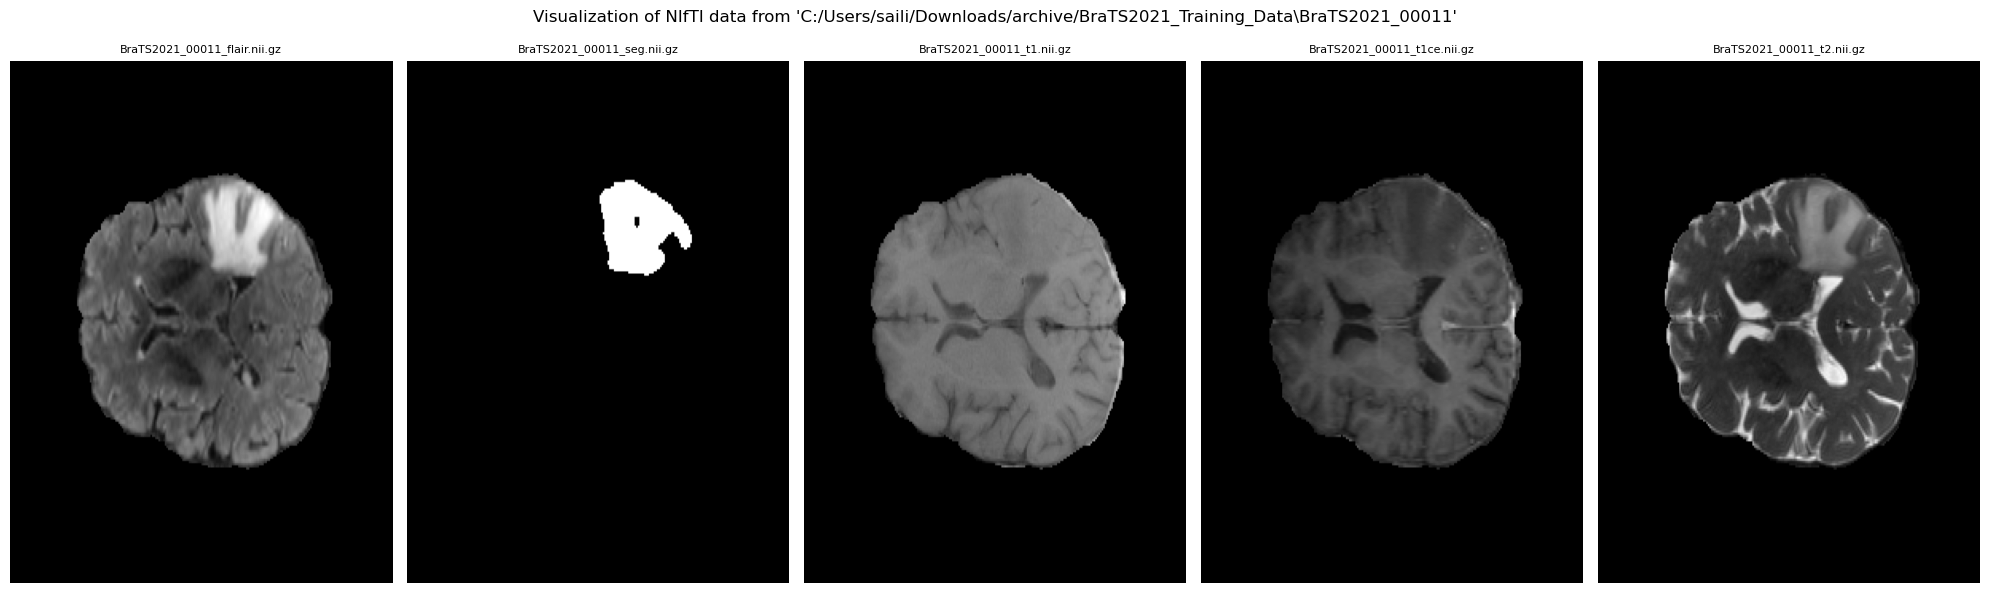

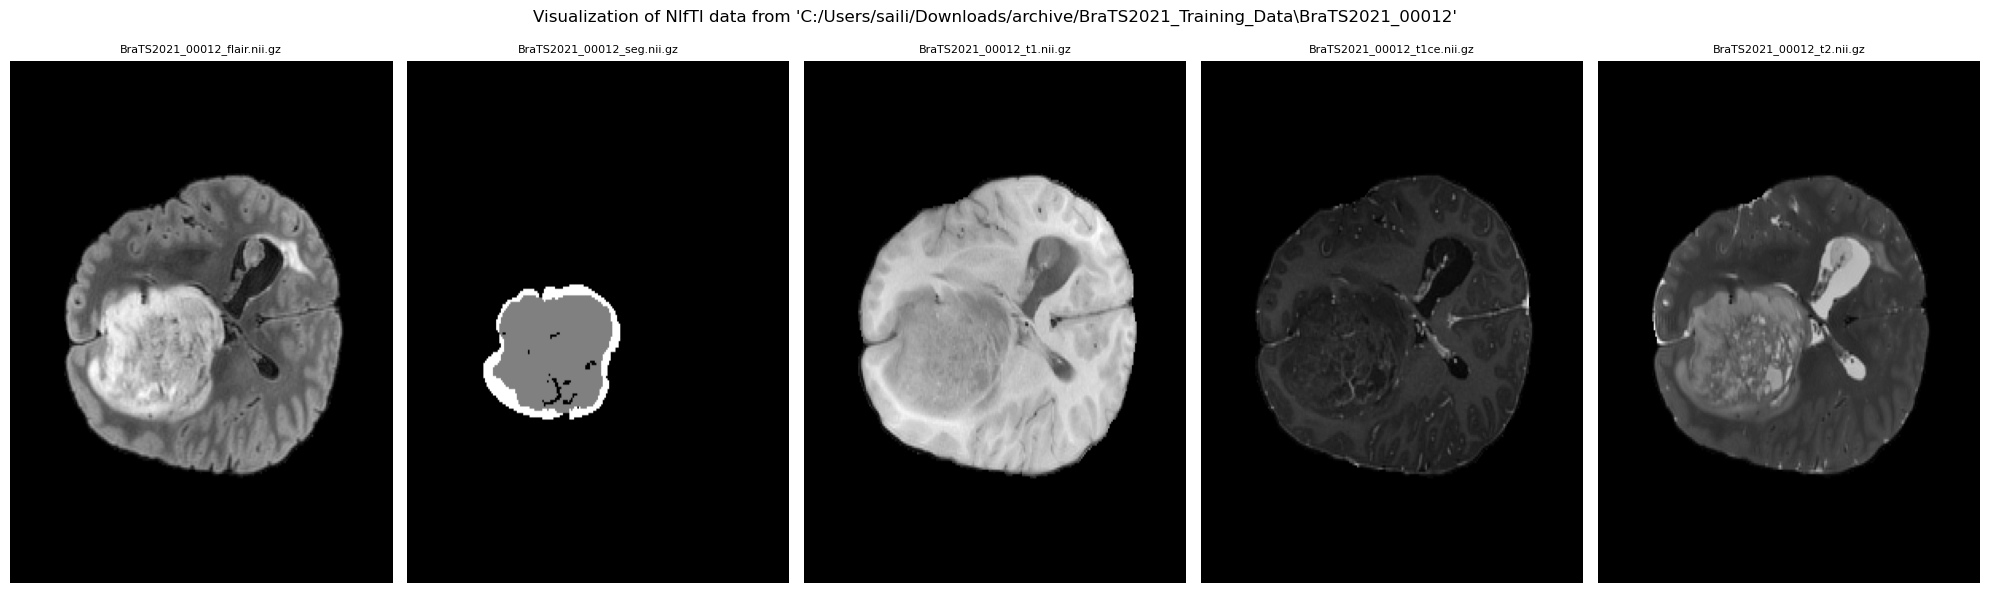

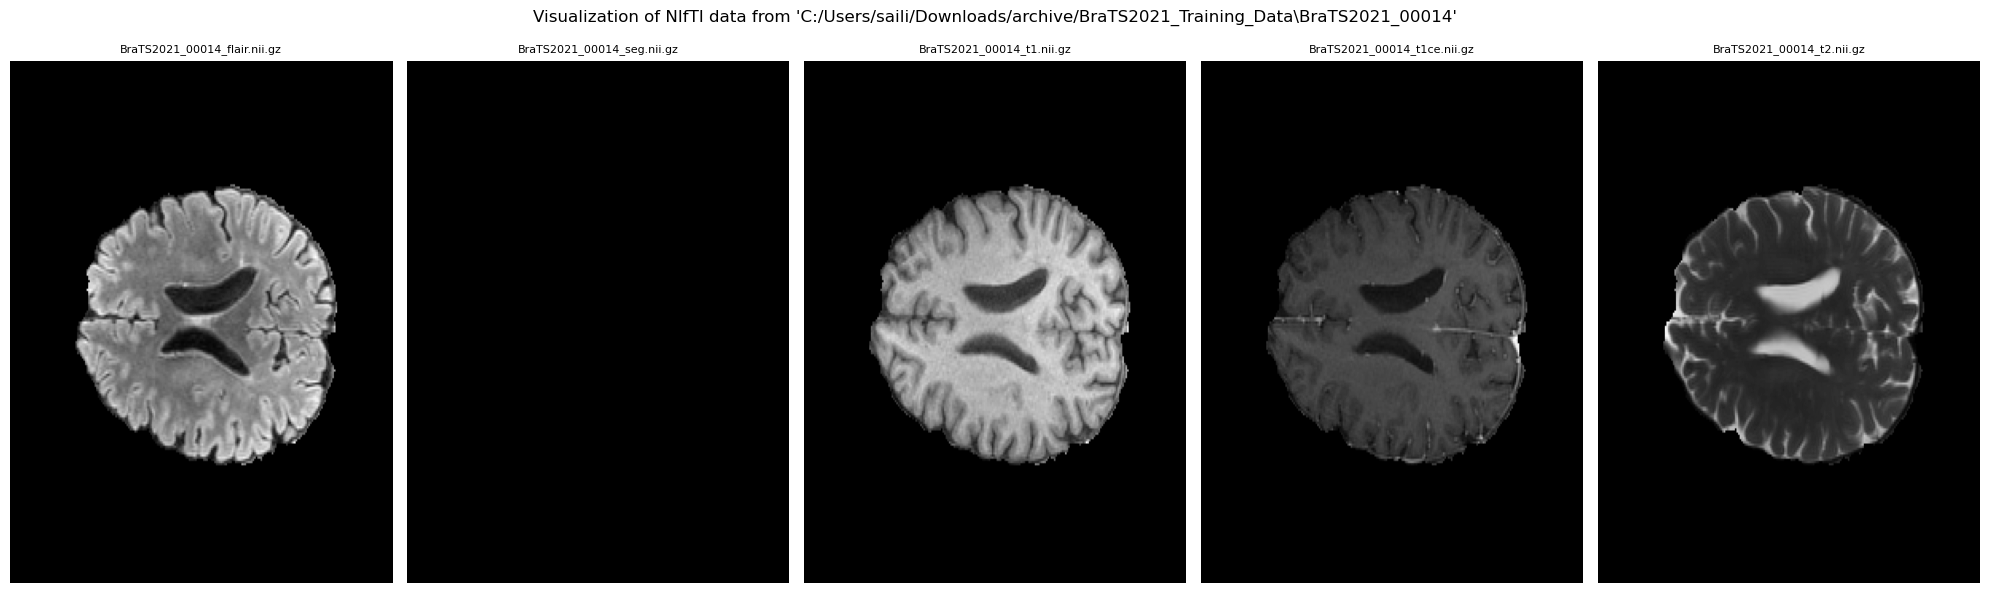

In [5]:
import os
import nibabel as nib
import matplotlib.pyplot as plt

def visualize_brats_training_data(data_dir, num_rows, num_cols, figsize=(20, 6), num_folders=10):
    subdirs = [os.path.join(data_dir, subdir) for subdir in os.listdir(data_dir) if os.path.isdir(os.path.join(data_dir, subdir))]
    subdirs.sort()  # Sort for consistent processing order (optional)

    for i, subdir in enumerate(subdirs[:num_folders]):
        try:
            # Attempt to load any NIfTI files within the directory
            image_files = [os.path.join(subdir, filename) for filename in os.listdir(subdir) if filename.endswith('.nii.gz')]

            if not image_files:
                print(f"Skipping directory '{subdir}': No NIfTI files found.")
                continue

            fig, axes = plt.subplots(num_rows, num_cols, figsize=figsize)
            axes = axes.flatten()  # Flatten the 2D array for easier iteration

            for j, img_file in enumerate(image_files):
                try:
                    # Load NIfTI data
                    img = nib.load(img_file)
                    # Access shape from the loaded image object
                    img_data = img.get_fdata()[..., img.shape[2] // 2]  # Get central slice
                    axes[j].imshow(img_data, cmap='gray', aspect='auto')  # Plot central slice
                    axes[j].set_title(os.path.basename(img_file), fontsize=8)  # Set title with file name
                    axes[j].axis('off')  # Hide axes
                except Exception as e:  # Catch potential errors
                    print(f"Error processing file '{img_file}': {e}")
                    axes[j].text(0.5, 0.5, 'Error loading file', ha='center', va='center', fontsize=10, color='red')

            fig.suptitle(f"Visualization of NIfTI data from '{subdir}'", fontsize=12)
            plt.tight_layout()
            plt.show()
        except Exception as e: 
            print(f"Error processing directory '{subdir}': {e}")

data_dir = "C:/Users/saili/Downloads/archive/BraTS2021_Training_Data"
num_rows = 1
num_cols = 5

visualize_brats_training_data(data_dir, num_rows, num_cols)
